# ANOVA: Analysis of Variance

This technique is most useful when you want to compare some quantitative data across some categorical data (often we have more than two levels to our categorical variable). For instance in our Pace of Life survey. We could look at the DassTotal when we look at different grade level. The question we are answering here is if there is a significant difference between the means across these groups. 

So if we spoke about this in the language of hypothesis testing our hypothesis would be:

    * H_0: All the means of the different groups are equal
    * H_a: At least one pair of means of the groups are different
    
There are some assumptions that the data must meet to make the test be valid. These are:

* Simple Random Sampling or independent observations
* Independent groups
* Standard deviation across groups are the same
* Each group has a large enough number of observations (n>20). This supports normality.

## Pace of life example

Let's load the data and look at the infomation:

```
library(ggplot2)
pol<-read.csv("POLFINALRevise2019V2.csv")
head(pol[,c("DassTotal","GRADENOPG")])
```

In [4]:
library(ggplot2)
pol<-read.csv("POLFINALRevise2019V2.csv")
head(pol[,c("DassTotal","GRADENOPG")])

DassTotal,GRADENOPG
8,Freshman
7,Sophomore
19,Junior
6,Sophomore
10,Sophomore
4,Junior


Next we should look at the data. Below you will see a boxplot of the data grouped by various grade levels. 

```
# Box plot
boxplot(DassTotal ~ GRADENOPG, data = pol,
        xlab = "Grade", ylab = "Stress",
        frame = FALSE, col = c("#00AFBB", "#E7B800", "#FC4E07", "green"))
# plotmeans
library("gplots")
plotmeans(DassTotal ~ GRADENOPG, data = pol, frame = FALSE,
          xlab = "Grade", ylab = "Stress",
          main="Mean Plot with 95% CI") 
```


Attaching package: ‘gplots’



The following object is masked from ‘package:stats’:

    lowess



Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"frame" is not a graphical parameter”

Warning message in axis(1, at = 1:length(means), labels = legends, ...):
“"frame" is not a graphical parameter”

Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"frame" is not a graphical parameter”

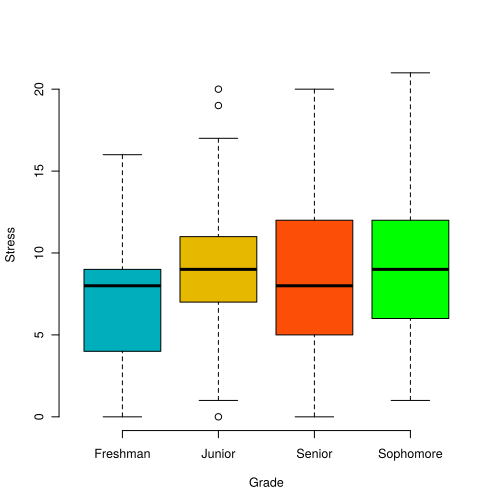

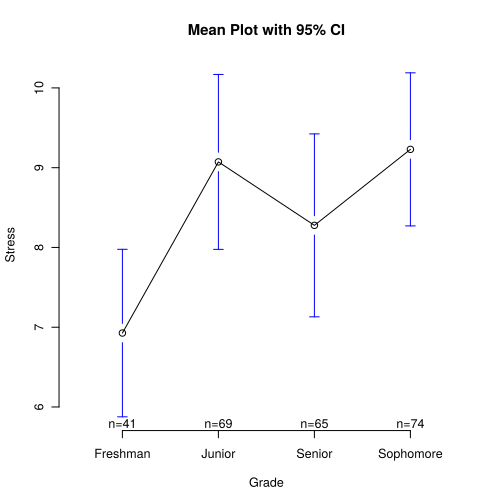

In [5]:
boxplot(DassTotal ~ GRADENOPG, data = pol,
        xlab = "Grade", ylab = "Stress",
        frame = FALSE, col = c("#00AFBB", "#E7B800", "#FC4E07", "green"))
# plotmeans
library("gplots")
plotmeans(DassTotal ~ GRADENOPG, data = pol, frame = FALSE,
          xlab = "Grade", ylab = "Stress",
          main="Mean Plot with 95% CI")

Let's make sure that we have the right kind of data for an ANOVA:

```
class(pol$DassTotal)
class(pol$GRADENOPG)
levels(pol$GRADENOPG)
```

In [6]:
class(pol$DassTotal)
class(pol$GRADENOPG)
levels(pol$GRADENOPG)

[1] "integer"

[1] "factor"

[1] "Freshman"  "Junior"    "Senior"    "Sophomore"

Now we do the ANOVA and save it in a variable called anov1:

```
anov1<-aov(pol$DassTotal~pol$GRADENOPG)
anov1
summary(anov1)
```

In [7]:
anov1<-aov(pol$DassTotal~pol$GRADENOPG)
anov1
summary(anov1)

Call:
   aov(formula = pol$DassTotal ~ pol$GRADENOPG)

Terms:
                pol$GRADENOPG Residuals
Sum of Squares        165.877  4483.528
Deg. of Freedom             3       245

Residual standard error: 4.277863
Estimated effects may be unbalanced

               Df Sum Sq Mean Sq F value Pr(>F)  
pol$GRADENOPG   3    166   55.29   3.021 0.0304 *
Residuals     245   4484   18.30                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# Your Turn

Look at the data in our music experiment. Use an ANOVA to determine if there is a statistical difference between the way that people were able to answer math questions with different kinds of music.

First load the data and take a look at it. 

```
music<-read.csv("MusicData2.csv")
head(music)
```


In [9]:
music<-read.csv("MusicData2.csv")
head(music)

Timestamp,Data.Science.Student,Test.Subject,Addition.Score.Thunderstruck,Addition.score.with.My.Girl,Addition.score.with.Yes.Indeed
4/23/2019 9:10:22,41,45,50,M,NA
4/23/2019 9:26:08,39,33,29,M,NA
4/23/2019 9:27:11,38,45,43,M,NA
4/23/2019 9:30:55,29,34,20,M,NA
4/23/2019 9:36:45,30,29,29,M,NA
4/23/2019 9:37:07,32,39,40,M,NA


# Clean the data

We need to arrange the data differently. We want there to be a column that is just the score of on the math test and then another column that says what song is being played.
So we want the row:

|Timestamp|Thunderstruck|My_Girl|Yes_Indeed|Gender|
|---------|-------------|-------|----------|------|
|4/23/2019 9:10:22|41|45|50|M|

to turn into several rows of a new table
|Timestamp|Song|Score|Gender|
|---------|-------------|----------|------|
|4/23/2019 9:10:22|Thunderstruck|41|M|
|4/23/2019 9:10:22|My_Girl|45|M|
|4/23/2019 9:10:22|Yes_Indeed|50|M|

To do this we need the gather function in the ```tidyverse``` library. This function allows you to take the values that are listed under several columns and then list them in a single new column (the "value" column) and then record the name of the column that the value came in the "key" column.

```
library(tidyverse)
music<-gather(data=music,Thunderstruck, My_Girl,Yes_Indeed, key="Song", value="Score")
head(music)
```

In [12]:
library(tidyverse)
music<-gather(data=music,Addition.Score.Thunderstruck, Addition.score.with.My.Girl,Addition.score.with.Yes.Indeed, key="Song", value="Score")
head(music)

Warning message:
“attributes are not identical across measure variables;
they will be dropped”

Timestamp,Data.Science.Student,Test.Subject,Song,Score
4/23/2019 9:10:22,41,45,Addition.Score.Thunderstruck,50
4/23/2019 9:26:08,39,33,Addition.Score.Thunderstruck,29
4/23/2019 9:27:11,38,45,Addition.Score.Thunderstruck,43
4/23/2019 9:30:55,29,34,Addition.Score.Thunderstruck,20
4/23/2019 9:36:45,30,29,Addition.Score.Thunderstruck,29
4/23/2019 9:37:07,32,39,Addition.Score.Thunderstruck,40


## Your assignment

Now that ```music``` is a nice dataset. Please do the following in the given order:

For Song:

* Create boxplots that compare the distributions of the scores by the song
* Write a short analysis of whether the graph supports the idea the songs allow for different results on the addition test.
* State the Hypothesis for an ANOVA test
* Do an ANOVA analysis
* Write a short analysis of whether the ANOVA test supports the idea that the songs allow for different results. Use the p-value given in the ANOVA to support your answer.

For Gender:

* Create boxplots that compare the distributions of the scores by the song
* Write a short analysis of whether the graph supports the idea the songs allow for different results on the addition test.
* State the Hypothesis for an ANOVA test
* Do an ANOVA analysis
* Write a short analysis of whether the ANOVA test supports the idea that the songs allow for different results. Use the p-value given in the ANOVA to support your answer.



In [13]:
boxplot(Score ~ Song, data = music,
        xlab = "Song", ylab = "Score",
        frame = FALSE, col = c("#00AFBB", "#E7B800", "#FC4E07", "green"))

ERROR: Error in x[floor(d)] + x[ceiling(d)]: non-numeric argument to binary operator
